### C. Elegans

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
G = nx.read_gml('networks/celegansneural.gml', label = 'id')
G = nx.DiGraph(G)

In [3]:
# distribuição empírica (faça um gráfico com
# as diferentes redes).

n_V = G.number_of_nodes()
n_E = G.number_of_edges()
print(f"Number of nodes: {n_V}")
print(f"Number of edges: {n_E}")
print(f"Directed graph: {nx.is_directed(G)}")
#print(f"Connected graph: {nx.is_connected(G)}")
#print(f"Connected components: {nx.number_connected_components(G)}")

Number of nodes: 297
Number of edges: 2345
Directed graph: True


In [4]:
# Degree
degrees = np.array([int(dg) for (node, dg) in G.degree()])
print(f"Max: {degrees.max()}")
print(f"Min: {degrees.min()}")
print(f"Mean: {degrees.mean()}")
print(f"Median: {np.median(degrees)}")
print(f"Std: {degrees.std()}")


Max: 134
Min: 1
Mean: 15.79124579124579
Median: 13.0
Std: 13.933591563874678


In [5]:
# Distance
#if nx.is_connected(G):
#    d_mean = nx.average_shortest_path_length(G)
#    print(f"{d_mean}")

dist = dict(nx.all_pairs_shortest_path_length(G))
distas = list()
for i in dist.values():
    distas = distas+list(i.values())
distas = np.array(distas)
distas = distas[distas != 0]
print(f"Max: {distas.max()}")
print(f"Min: {distas.min()}")
print(f"Mean: {distas.mean()}")
print(f"Median: {np.median(distas)}")
print(f"Std: {distas.std()}")

Max: 14
Min: 1
Mean: 3.9918839808408726
Median: 3.0
Std: 2.024240131333209


In [6]:
# Cluster
cluster = np.array(list(nx.clustering(G).values()))
print(f"Max: {cluster.max()}")
print(f"Min: {cluster.min()}")
print(f"Mean: {cluster.mean()}")
print(f"Median: {np.median(cluster)}")
print(f"Std: {cluster.std()}")
print(f"Global: {nx.transitivity(G)}")

Max: 0.5
Min: 0.0
Mean: 0.17355726624539405
Median: 0.16044776119402984
Std: 0.10315401009961192
Global: 0.1469370031398223


In [7]:
# Degree centrality
dc = np.array(list(nx.degree_centrality(G).values()))
print(f"Max: {dc.max()}")
print(f"Min: {dc.min()}")
print(f"Mean: {dc.mean()}")
print(f"Median: {np.median(dc)}")
print(f"Std: {dc.std()}")

Max: 0.45270270270270274
Min: 0.0033783783783783786
Mean: 0.05334880334880335
Median: 0.04391891891891892
Std: 0.04707294447254959


In [8]:
# Betweeness centrality
bc = np.array(list(nx.betweenness_centrality(G).values()))
print(f"Max: {bc.max()}")
print(f"Min: {bc.min()}")
print(f"Mean: {bc.mean()}")
print(f"Median: {np.median(bc)}")
print(f"Std: {bc.std()}")

Max: 0.10525345640186988
Min: 0.0
Mean: 0.0078037590749455155
Median: 0.002428456791137078
Std: 0.014149290252565158


In [9]:
# Closeness centrality
cloc = np.array(list(nx.closeness_centrality(G).values()))
print(f"Max: {cloc.max()}")
print(f"Min: {cloc.min()}")
print(f"Mean: {cloc.mean()}")
print(f"Median: {np.median(cloc)}")
print(f"Std: {cloc.std()}")

Max: 0.5767025248933143
Min: 0.0
Mean: 0.19771840449604486
Median: 0.21369557787359345
Std: 0.0767152848525374


In [10]:
# Eigenvector centrality
ec = np.array(list(nx.eigenvector_centrality(G).values()))
print(f"Max: {ec.max()}")
print(f"Min: {ec.min()}")
print(f"Mean: {ec.mean()}")
print(f"Median: {np.median(ec)}")
print(f"Std: {ec.std()}")

Max: 0.5804838559101521
Min: 1.915077331049173e-24
Mean: 0.03164939682452153
Median: 0.014576806150511427
Std: 0.04863454582544526


In [11]:
# Katz centrality
kc = np.array(list(nx.katz_centrality_numpy(G).values()))
print(f"Max: {kc.max()}")
print(f"Min: {kc.min()}")
print(f"Mean: {kc.mean()}")
print(f"Median: {np.median(kc)}")
print(f"Std: {kc.std()}")

Max: 0.5564953041786767
Min: 0.002606405837344658
Mean: 0.03455064814372364
Median: 0.01912246469978984
Std: 0.04661819472965436


In [12]:
# PageRank centrality
pr = np.array(list(nx.pagerank(G).values()))
print(f"Max: {pr.max()}")
print(f"Min: {pr.min()}")
print(f"Mean: {pr.mean()}")
print(f"Median: {np.median(pr)}")
print(f"Std: {pr.std()}")

Max: 0.12522400833754263
Min: 0.0009477918988259463
Mean: 0.0033670033670033664
Median: 0.002149360107337438
Std: 0.007554218210256578


In [13]:
# VoteRank centrality
vr = np.array(nx.voterank(G))
print(f"Max: {vr.max()}")
print(f"Min: {vr.min()}")
print(f"Mean: {vr.mean()}")
print(f"Median: {np.median(vr)}")
print(f"Std: {vr.std()}")

Max: 284
Min: 1
Mean: 133.6949152542373
Median: 133.0
Std: 77.39076593568164


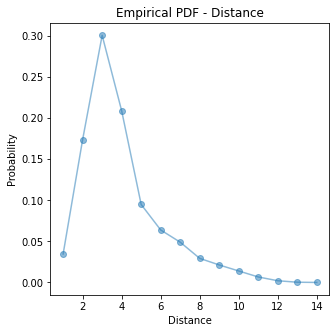

In [19]:
# pdf
x, f_k = np.unique(distas, return_counts=True)
pdf = f_k/f_k.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PDF - Distance')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x, pdf, alpha=0.5)
plt.plot(x, pdf, alpha=0.5)
plt.show()

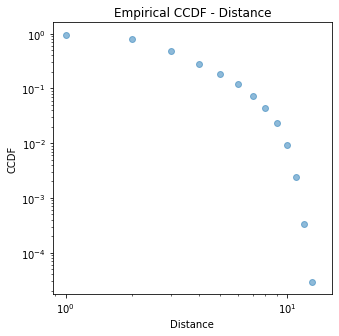

In [15]:
# CCDF
cdf = f_k.cumsum()/f_k.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x, ccdf, alpha=0.5)
plt.title('Empirical CCDF - Distance')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('CCDF')

plt.show()

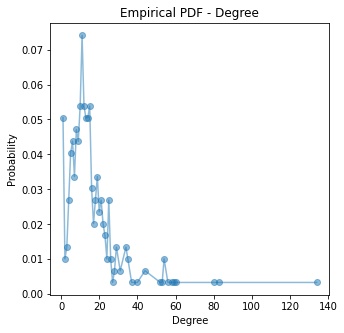

In [16]:
# pdf
x_g, f_k_g = np.unique(degrees, return_counts=True)
pdf_g = f_k_g/f_k_g.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PDF - Degree')
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.scatter(x_g, pdf_g, alpha=0.5)
plt.plot(x_g, pdf_g, alpha=0.5)
plt.show()

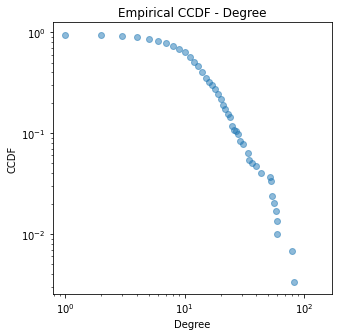

In [17]:
# CCDF
cdf_g = f_k_g.cumsum()/f_k_g.sum()
ccdf_g = 1-cdf_g

plt.figure(figsize=(5,5))
plt.scatter(x_g, ccdf_g, alpha=0.5)
plt.title('Empirical CCDF - Degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.show()

In [18]:
np.savetxt('data/celegans-dista-x.txt', x, delimiter=',', fmt='%d')
np.savetxt('data/celegans-dista-pdf.txt', pdf, delimiter=',', fmt='%f')
np.savetxt('data/celegans-dista-ccdf.txt', ccdf, delimiter=',', fmt='%f')

np.savetxt('data/celegans-degree-x.txt', x_g, delimiter=',', fmt='%d')
np.savetxt('data/celegans-degree-pdf.txt', pdf_g, delimiter=',', fmt='%f')
np.savetxt('data/celegans-degree-ccdf.txt', ccdf_g, delimiter=',', fmt='%f')